# Project: Investigate a Dataset (Tmdb-movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

To complete my Data Analysis project I selected TMDB movies dataset.

This data set contains 10 about 10 thousand movie collection with 21 columns of each.

In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime


<a id='intro'></a>
## Questions in my mind for this Dataset

1. Calculating the profit of the each movie

2. Movies which had most and least profit

3. Movies with largest and lowest budgets

4. Movies with most and least earned revenue

5. Movies with longest and shortest runtime

6. Average runtime of the movies

7. Year of release vs Profitability - To find that which year made the highest profit?
		
8. Most Succesful Genres

9. Most Frequent Cast

10. Average Budget of the movies

11. Average Revenue earned by the movies

12. Average duration of the movies

<a id='wrangling'></a>
## Data Wrangling

> Now i am going to load TMDB movie data, check for cleanliness, and then trim and clean tmdb dataset for analysis.

### General Properties

In [2]:
# Loading the data

movie = pd.read_csv('tmdb-movies.csv')

# Printing first three rows
movie.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


> There is a big amount of data in which i need to change data format for some column, also need to remove null values and need to eliminate some unwanted columns

### Data Cleaning (Eliminating the unwanted columns from the Dataset)

In [ ]:
# Changes need to be done for the dataset

1 - Remove unwanted columns
2 - Check duplicacy and remove if any
3 - changing release date format
4 - Replacing zeros with NAN in runtime, budget and revenue column and drop them
5 - changing format of revenue and budget


In [3]:
## 1 - Removing unwanted columns

cols = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

# drop columns
movie = movie.drop(cols,1)

# verifying the changes
movie.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015


> Checking the no fo entries in the dataset

In [4]:
movie.shape

(10866, 10)



### 2  - checking duplicate entries

In [5]:
movie.duplicated().sum()

1

> There is only one duplicate entry

In [6]:
# Delete duplicate entry
movie.drop_duplicates(inplace=True)

In [7]:
# verifying the changes
movie.shape

(10865, 10)

> Deleted succesfully

### 3 - Changing release date format

In [9]:
movie['release_date'] = pd.to_datetime(movie['release_date'])

In [10]:
movie.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


> Release date format changed.

### 4 - Replacing zeros with NAN in runtime, budget and revenue column and dropping them

In [11]:
list_cols = ['runtime', 'budget', 'revenue']
movie[list_cols] = movie[list_cols].replace(0, np.NAN)

> Total number of entries right now

In [12]:
movie.shape

(10865, 10)

> Dropping entries with NAN values

In [13]:
movie.dropna(inplace=True)

> verifying new changes

In [14]:
movie.shape

(3572, 10)

In [15]:
movie.head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,2015-04-01,2015


### 5 - changing format of revenue and budget

In [18]:
# check format of columns
movie.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [19]:
columns = ['budget', 'revenue']

# changing datatype fo revenue and budget
movie[columns] = movie[columns].applymap(np.int64)

# verify changes
movie.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

> Datatypes changes successfully

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Calculating the profit of the each movie)

In [20]:
# To calculate profit we need to subtract budget from revenue
movie.insert(2, 'profit', movie['revenue']-movie['budget'])

# Printing first three rows to verify changes
movie.head(3)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015


### Research Question 2  (Movies having most and least profit !)

In [21]:
# creating a common function to calculate for all most and least questions

def mostandleast(col):
    # for most earned values
    high = movie[col].idxmax()
    high_data = pd.DataFrame(movie.loc[high])
    
    # for least earned values
    low = movie[col].idxmin()
    low_data = pd.DataFrame(movie.loc[low])
    
    # Extracting data
    data = pd.concat([high_data, low_data], axis=1)
    
    return data

# calculate profit
mostandleast('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Research Question 3 (Movies with largest and lowest budgets !)

In [22]:
mostandleast('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Research Question 4 Movies with most and least earned revenue !)

In [23]:
mostandleast('revenue')

,1386,8142
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
release_date,2009-12-10 00:00:00,1995-10-20 00:00:00


### Research Question 5 (Movies with longest and shortest runtime !)

In [24]:
mostandleast('runtime')

,2107,8005
budget,18000000,3000000
revenue,871279,21000000
profit,-17128721,18000000
original_title,Carlos,Mickey's Christmas Carol
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Olivier Assayas,Burny Mattinson
tagline,The man who hijacked the world,He's back! Mickey Mouse - in his first new mot...
runtime,338,26
genres,Crime|Drama|Thriller|History,Family|Animation
release_date,2010-05-19 00:00:00,1983-10-19 00:00:00


### Research Question 6 (Average runtime of the movies !)

In [26]:
# creating a average calculating function for upcoming questions

def average(column):
    return movie[column].mean()

# calculate average runtime of movies
average('runtime')

109.12290033594626

> So the average runtime of movies comes out to be 109 approx, it's graphical representation something looks like this.

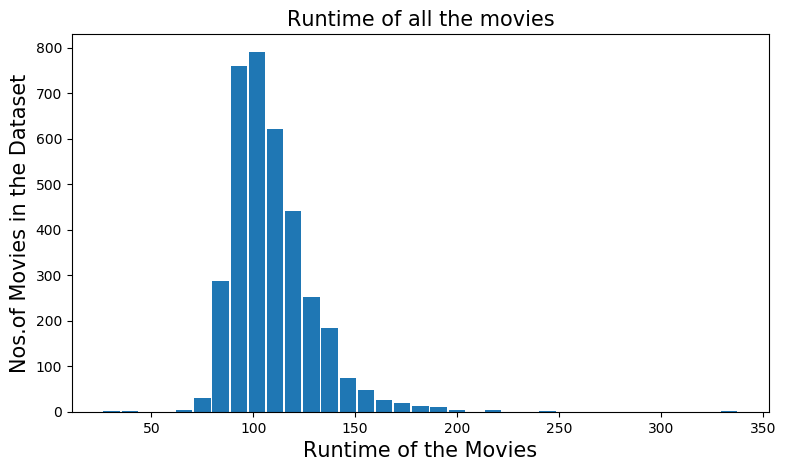

In [27]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(movie['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

In [29]:
# confirming
movie['runtime'].describe()

count    3572.000000
mean      109.122900
std        19.686816
min        26.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Research Question 7 (Year of release vs Profitability !)

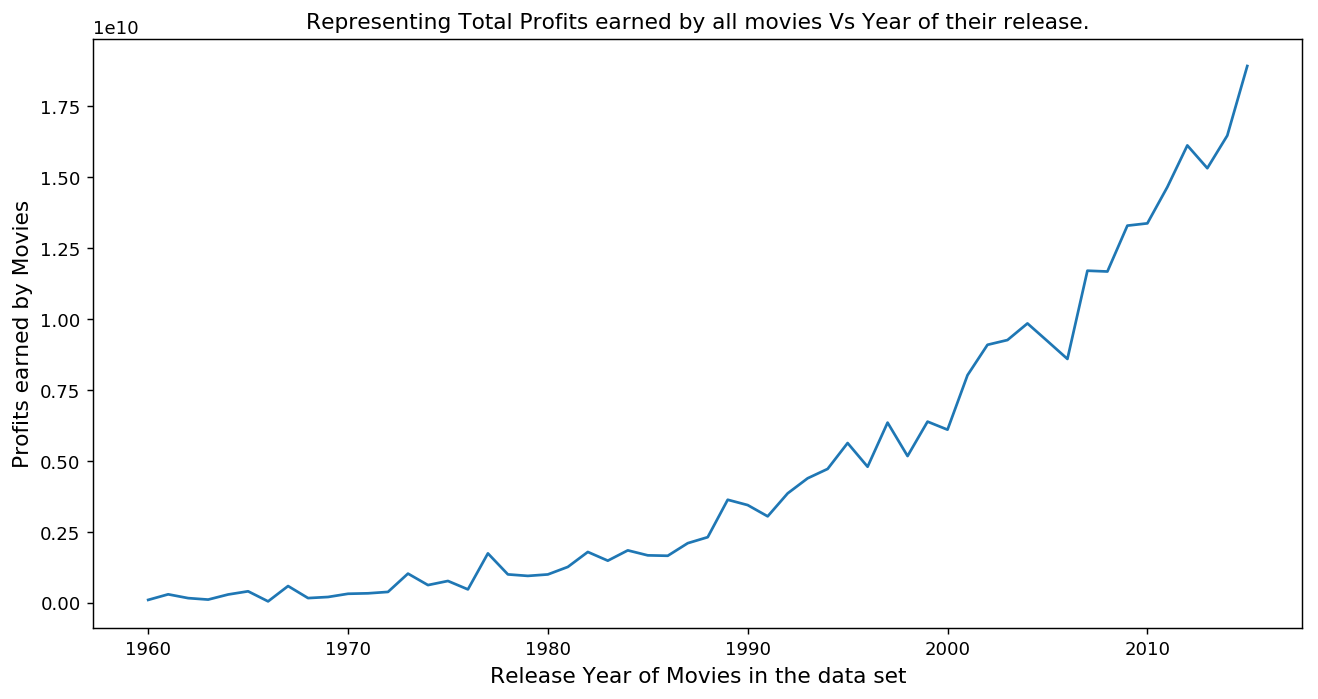

In [31]:
# year of release vs profitablility

profits_year = movie.groupby('release_year')['profit'].sum()

plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Profits earned by Movies', fontsize = 12)
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [32]:
# To find which year made the highest profit
profits_year.idxmax()

2015

In [34]:
#selecting the movies having profit $50M or more
profit_data = movie[movie['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [35]:
#counting the no.of rows
len(profit_data)

1313

In [36]:
#function to split and count 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

### Research Question 8 (Most successful genres !)

In [37]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       483
Drama        467
Action       457
Thriller     399
Adventure    373
dtype: int64

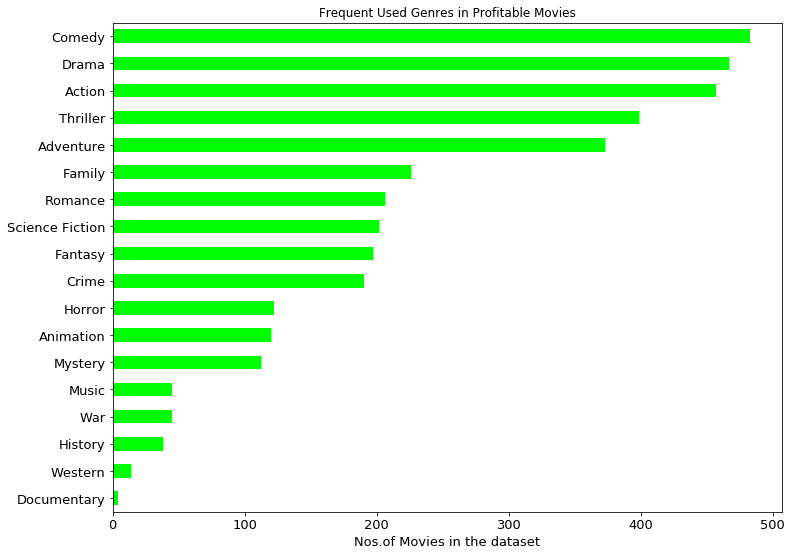

In [38]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

### Research Question 9 (Most Frequent Cast !)

In [39]:
# calculating most frequent cast
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

### Research Question 10 (Average Budget of the movies !)

In [42]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [43]:
# calling the average function for calculating the average budget of the movies
profit_avg('budget')

60827647.54760092

### Research Question 11 (Average Revenue earned by the movies !)

In [44]:
profit_avg('revenue')

256486189.0571211

### Research Question 12 (Average duration of the movies !)

In [45]:
profit_avg('runtime')

113.57578065498858

### Saving the result dataframe to a csv file

In [46]:
movie.to_csv('final_output.csv', index=False)

<a id='conclusions'></a>
## Conclusions

> On the basis of the above analysis we can conclude following:
1. Average Budget must be around 60 million dollar
2. Average duration of the movie must be 113 minutes
3. Any one of these should be in the cast :Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone,Cameron Diaz
4. Genre must be : Action, Adventure, Thriller, Comedy, Drama.

By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million dollar.